### Importing Libraries and loading dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
sns.set()
import numpy as np
import statsmodels.api as sm
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

In [2]:
ecommerce = pd.read_excel('/content/Sample_Longlist_Data.xlsx')
ecommerce.head()

,Date Added,category,sellerlink,sellerlink-url,sellerstorefront-url,sellerproductcount,sellerratings,sellerdetails,seller business name,businessaddress,Count of seller brands,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,Hero Product 1 #ratings,Hero Product 2 #ratings,Sample brand name,Sample Brand URL
0,2020-11-15,Garden,Seller 1,Seller 1-link,Seller 1-storefrontlink,"1-16 of over 100,000 results",88% positive in the last 12 months (118 ratings),Lohas Living Inc James Mazzello US 845 3RD Ave...,Business Name:Lohas Living Inc,411 THEODORE FREMD AVESTE 206 SOUTHRyeNY10580-...,16,17,11,12,5873,4957,Visit the YAMAZAKI Store,https://www.amazon.de/-/en/stores/YAMAZAKI/pag...
1,2020-11-15,Garden,Seller 2,Seller 2-link,Seller 2-storefrontlink,NaN,90% positive in the last 12 months (566 ratings),Herzlich Willkommen im Amazon Shop von 1a-Hand...,Business Name:1a-Handelsagentur,1a HandelsagenturLindenallee 2MalchowMecklenbu...,0,2,2,9,0,0,Visit the tesa Store,https://www.amazon.de/-/en/stores/tesa/page/12...
2,2020-11-15,Garden,Seller 3,Seller 3-link,Seller 3-storefrontlink,"1-16 of over 2,000 results",85% positive in the last 12 months (75 ratings),67878u6i7 is committed to providing each custo...,Business Name:nantongaohuanfangzhipinyouxiango...,zhongnanshijicheng27zhuang1410haochongchuanqun...,15,0,25,12,164,162,TXYFYP,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...
3,2020-11-15,Garden,Seller 4,Seller 4-link,Seller 4-storefrontlink,1-16 of 123 results,NaN,7 days home life supermarket is committed to p...,Business Name:Zhengzhou Yaoqiong Trading Company,河南省中兴南路福禄街自贸试验区郑州片区（郑东）河南商会大厦1901室450000CN,1,0,0,0,0,0,SHIFENG,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...
4,2020-11-15,Garden,Seller 5,Seller 5-link,Seller 5-storefrontlink,"1-16 of over 1,000 results",81% positive in the last 12 months (52 ratings),78 68yui678 is committed to providing each cus...,Business Name:shenzhenfeichangshangmeimaoyiyou...,minzhidadaoshaxialaocun94dongA901longhuaxinqus...,16,0,31,15,224,113,YUOKI99,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...


In [3]:
ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1839 entries, 0 to 1838
Data columns (total 18 columns):
 #   Column                                             Non-Null Count  Dtype         
---  ------                                             --------------  -----         
 0   Date Added                                         1839 non-null   datetime64[ns]
 1   category                                           1839 non-null   object        
 2   sellerlink                                         1839 non-null   object        
 3   sellerlink-url                                     1839 non-null   object        
 4   sellerstorefront-url                               1839 non-null   object        
 5   sellerproductcount                                 1513 non-null   object        
 6   sellerratings                                      1411 non-null   object        
 7   sellerdetails                                      1812 non-null   object        
 8   seller business na

### Data Cleaning
1. Dropping Null elements
2. Indexing
3. Extracting the sellercount
4. Extracting the positive rate %
5. Extracting the ratecount
6. Extracting contact information
7. Removing China(CN) 

#### Dropping Null elements

In [4]:
ecommerce.isna().sum()

Date Added                                             0
category                                               0
sellerlink                                             0
sellerlink-url                                         0
sellerstorefront-url                                   0
sellerproductcount                                   326
sellerratings                                        428
sellerdetails                                         27
seller business name                                  56
businessaddress                                       75
Count of seller brands                                 0
Max % of negative seller ratings - last 30 days        0
Max % of negative seller ratings - last 90 days        0
Max % of negative seller ratings - last 12 months      0
Hero Product 1 #ratings                                0
Hero Product 2 #ratings                                0
Sample brand name                                      4
Sample Brand URL               

In [5]:
ecommerce.dropna(inplace=True)

In [6]:
ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1159 entries, 0 to 1838
Data columns (total 18 columns):
 #   Column                                             Non-Null Count  Dtype         
---  ------                                             --------------  -----         
 0   Date Added                                         1159 non-null   datetime64[ns]
 1   category                                           1159 non-null   object        
 2   sellerlink                                         1159 non-null   object        
 3   sellerlink-url                                     1159 non-null   object        
 4   sellerstorefront-url                               1159 non-null   object        
 5   sellerproductcount                                 1159 non-null   object        
 6   sellerratings                                      1159 non-null   object        
 7   sellerdetails                                      1159 non-null   object        
 8   seller business na

#### Indexing

In [7]:
# Unique value 
#ecommerce['sellerlink'].is_unique
#ecommerce = ecommerce.set_index('sellerlink')
#ecommerce.head()

#### Sellercount

In [8]:
#Extracting the count 
ecommerce['sellerproductcount'] = ecommerce['sellerproductcount'].str.split(" ").str[-2]

#### Sellerrating

In [9]:
#Extracting the positive % of rating in last 12 months
ecommerce['Positive %'] = ecommerce['sellerratings'].str.split("%").str[0]

#extracting the number of ratings
ecommerce['sellerratings'] = ecommerce['sellerratings'].str.extract('\((\d+(?:-\d+)?)', expand=False)

#### Contact details of seller

In [10]:
#Extracting phone number and email of the seller 

ecommerce['Phone_seller'] = ecommerce['sellerdetails'].str.extract(r'([\+\(]?[1-9][0-9 .\-\(\)]{8,}[0-9])')
ecommerce['E-mail_seller'] = ecommerce['sellerdetails'].str.extract(r'([a-zA-Z][a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]+)')


#### business address

In [11]:
#Removing China(CN)

ecommerce['Country'] = ecommerce['businessaddress'].str[-2:]
ecommerce = ecommerce[ecommerce['Country'] != 'CN']

ecommerce.head()

,Date Added,category,sellerlink,sellerlink-url,sellerstorefront-url,sellerproductcount,sellerratings,sellerdetails,seller business name,businessaddress,...,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,Hero Product 1 #ratings,Hero Product 2 #ratings,Sample brand name,Sample Brand URL,Positive %,Phone_seller,E-mail_seller,Country
0,2020-11-15,Garden,Seller 1,Seller 1-link,Seller 1-storefrontlink,"100,000",118,Lohas Living Inc James Mazzello US 845 3RD Ave...,Business Name:Lohas Living Inc,411 THEODORE FREMD AVESTE 206 SOUTHRyeNY10580-...,...,11,12,5873,4957,Visit the YAMAZAKI Store,https://www.amazon.de/-/en/stores/YAMAZAKI/pag...,88,10022-6630,jadgemaello@gmail.com,US
14,2020-11-15,Garden,Seller 15,Seller 15-link,Seller 15-storefrontlink,919,116,Impressum\n \n Gesetzliche Anbieterkennung:\n ...,Business Name:Oliver Mills,Kaiserstr.12Borgholzhausen33829DE,...,0,3,1446,921,Unbekannt,https://www.amazon.de/-/en/Unbekannt/b/ref=bl_...,97,15140008562,webmaster@9pm-store.de,DE
22,2020-11-15,Garden,Seller 23,Seller 23-link,Seller 23-storefrontlink,"40,000",10,Bestof Floral is committed to providing each c...,Business Name:MADEWELL SUPPLY INC,90 BROAD ST 2ND FLOORNEW YORKNY10004-2205US,...,0,0,10538,8293,Visit the Seville Classics Store,https://www.amazon.de/-/en/stores/Seville+Clas...,100,NaN,NaN,US
23,2020-11-15,Garden,Seller 24,Seller 24-link,Seller 24-storefrontlink,"100,000",3134,Blumenbecker Industriebedarf GmbH Sudhoferweg ...,Business Name:Blumenbecker Industriebedarf GmbH,Sudhoferweg 99-107BeckumNRW59269DE,...,12,10,30139,11182,Visit the tesa Store,https://www.amazon.de/-/en/stores/tesa/page/12...,88,99-107 59269,bib.beckum@blumenbecker.com,DE
24,2020-11-15,Garden,Seller 25,Seller 25-link,Seller 25-storefrontlink,"3,000",610,Herzlich willkommen auf unserer Internetpräsen...,Business Name:Jörg Müller & Petra Scheerer GbR,Miranderstr.21Korntal-Münchingen70825DE,...,1,2,3286,3079,Neudorff,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,97,NaN,NaN,DE


In [12]:
ecommerce.rename(columns = {'Count of seller brands':'sellerbrandcount', 'Max % of negative seller ratings - last 30 days':'MaxNegsellerRate30_%',
                              'Max % of negative seller ratings - last 90 days':'MaxNegsellerRate90_%','Max % of negative seller ratings - last 12 months':'MaxNegsellerRate12mnth_%',
                              'Hero Product 1 #ratings':'HP1','Hero Product 2 #ratings': 'HP2','Positive %': 'Pos_%'}, inplace = True)

In [13]:
list(ecommerce.columns)

['Date Added',
 'category',
 'sellerlink',
 'sellerlink-url',
 'sellerstorefront-url',
 'sellerproductcount',
 'sellerratings',
 'sellerdetails',
 'seller business name',
 'businessaddress',
 'sellerbrandcount',
 'MaxNegsellerRate30_%',
 'MaxNegsellerRate90_%',
 'MaxNegsellerRate12mnth_%',
 'HP1',
 'HP2',
 'Sample brand name',
 'Sample Brand URL',
 'Pos_%',
 'Phone_seller',
 'E-mail_seller',
 'Country']

In [14]:
ecommerce['sellerproductcount']= ecommerce['sellerproductcount'].str.replace(',', '')
ecommerce[['sellerproductcount','sellerratings','Pos_%']] = ecommerce[['sellerproductcount','sellerratings','Pos_%']].astype(str).astype(int)


### Analysis

##### Clustering

In [15]:
ecom2 = ecommerce.copy()

Text(0, 0.5, 'WCSS')

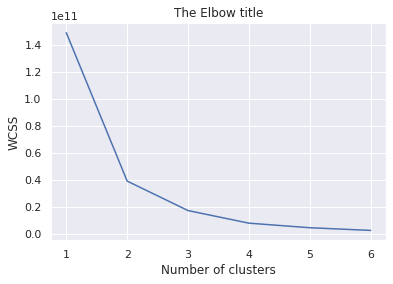

In [16]:
df1 = ecom2[['sellerproductcount','Country']]

df1["Country"] = df1["Country"].astype('category')
df1["Country_cat"] = df1["Country"].cat.codes
#df1

df1 = df1[['sellerproductcount','Country_cat']]

wcss=[]
for i in range(1,7):
  kmeans = KMeans(i)
  kmeans.fit(df1)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

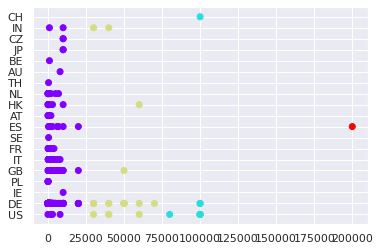

In [17]:
kmeans = KMeans(4)
kmeans.fit(df1)
identified_clusters = kmeans.fit_predict(df1)

data_with_clusters = ecom2.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['sellerproductcount'],data_with_clusters['Country'],c=data_with_clusters['Clusters'],cmap='rainbow')

Geographical Distribution

In [18]:
Hero_P1 = []
for row in ecom2['HP1']:
  if row > 60000 :
    Hero_P1.append('Top_rated')
  elif row > 40000:   
    Hero_P1.append('Medium_rated')
  elif row > 20000:  
    Hero_P1.append('Less_rated')
  else:
    Hero_P1.append('least_rated')

Hero_P2 = []
for row in ecom2['HP2']:
  if row > 60000 :
    Hero_P2.append('Top_rated')
  elif row > 40000:   
    Hero_P2.append('Medium_rated')
  elif row > 20000:  
    Hero_P2.append('Less_rated')
  else:
    Hero_P2.append('least_rated')

In [19]:
ecom2['Hero_P1']=Hero_P1
ecom2['Hero_P2']=Hero_P2

ecom2["Hero_P1"] = ecom2["Hero_P1"].astype('category')
ecom2["Hero_P1_cat"] = ecom2["Hero_P1"].cat.codes

ecom2["Hero_P2"] = ecom2["Hero_P2"].astype('category')
ecom2["Hero_P2_cat"] = ecom2["Hero_P2"].cat.codes

Text(0, 0.5, 'WCSS')

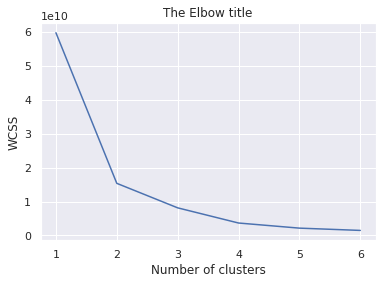

In [20]:
df1 = ecom2[['HP1','Hero_P1_cat']]

wcss=[]
for i in range(1,7):
  kmeans = KMeans(i)
  kmeans.fit(df1)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

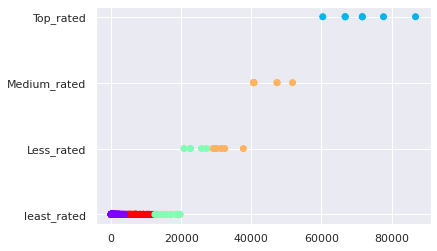

In [21]:
kmeans = KMeans(5)
kmeans.fit(df1)
identified_clusters = kmeans.fit_predict(df1)
data_with_clusters = ecom2.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['HP1'],data_with_clusters['Hero_P1'],c=data_with_clusters['Clusters'],cmap='rainbow')

Text(0, 0.5, 'WCSS')

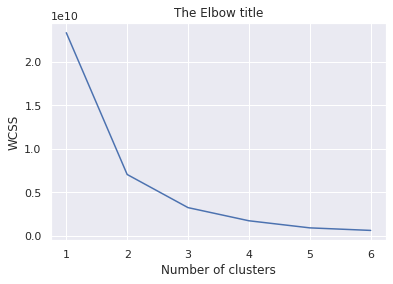

In [22]:
df1 = ecom2[['HP2','Hero_P2_cat']]

wcss=[]
for i in range(1,7):
  kmeans = KMeans(i)
  kmeans.fit(df1)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

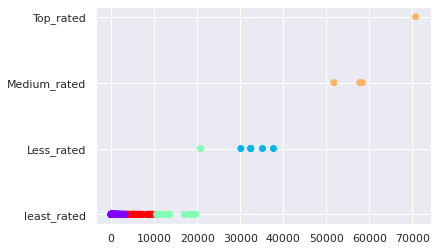

In [23]:
kmeans = KMeans(5)
kmeans.fit(df1)
identified_clusters = kmeans.fit_predict(df1)
data_with_clusters = ecom2.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['HP2'],data_with_clusters['Hero_P2'],c=data_with_clusters['Clusters'],cmap='rainbow')

For both HP1 and HP2 the distriution of rating is observed, in least and less rated products has furthermore clusters present in them, hence it can be divided into more types. But since we want top products this can ignored and only medium rated and top rated can be considered.

In [24]:
neg_30 = []
for row in ecom2['MaxNegsellerRate30_%']:
  if row < 25 :
    neg_30.append('Best')
  elif row < 50:   
    neg_30.append('Good')
  elif row < 75:  
    neg_30.append('Avg')
  else:
    neg_30.append('Worst')

ecom2['MaxNegsellerRate30_%_new'] = neg_30
ecom2['MaxNegsellerRate30_%_new'] = ecom2['MaxNegsellerRate30_%_new'].astype('category')
ecom2['MaxNegsellerRate30_%_cat'] = ecom2['MaxNegsellerRate30_%_new'].cat.codes

neg_90 = []
for row in ecom2['MaxNegsellerRate90_%']:
  if row < 25 :
    neg_90.append('Best')
  elif row < 50:   
    neg_90.append('Good')
  elif row < 75:  
    neg_90.append('Avg')
  else:
    neg_90.append('Worst')

ecom2['MaxNegsellerRate90_%_new'] = neg_90
ecom2['MaxNegsellerRate90_%_new'] = ecom2['MaxNegsellerRate90_%_new'].astype('category')
ecom2['MaxNegsellerRate90_%_cat'] = ecom2['MaxNegsellerRate90_%_new'].cat.codes

neg_12 = []
for row in ecom2['MaxNegsellerRate12mnth_%']:
  if row < 25 :
    neg_12.append('Best')
  elif row < 50:   
    neg_12.append('Good')
  elif row < 75:  
    neg_12.append('Avg')
  else:
    neg_12.append('Worst')

ecom2['MaxNegsellerRate12mnth_%_new'] = neg_12
ecom2['MaxNegsellerRate12mnth_%_new'] = ecom2['MaxNegsellerRate12mnth_%_new'].astype('category')
ecom2['MaxNegsellerRate12mnth_%_cat'] = ecom2['MaxNegsellerRate12mnth_%_new'].cat.codes

Text(0, 0.5, 'WCSS')

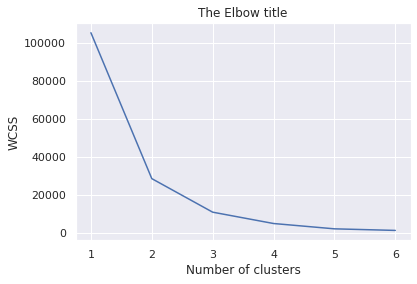

In [25]:
df1 = ecom2[['MaxNegsellerRate30_%','MaxNegsellerRate30_%_cat']]

wcss=[]
for i in range(1,7):
  kmeans = KMeans(i)
  kmeans.fit(df1)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

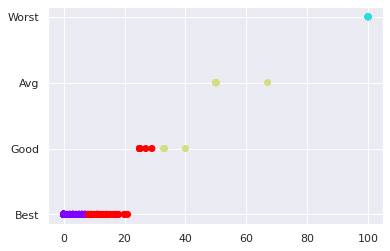

In [26]:
kmeans = KMeans(4)
kmeans.fit(df1)
identified_clusters = kmeans.fit_predict(df1)
data_with_clusters = ecom2.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['MaxNegsellerRate30_%'],data_with_clusters['MaxNegsellerRate30_%_new'],c=data_with_clusters['Clusters'],cmap='rainbow')

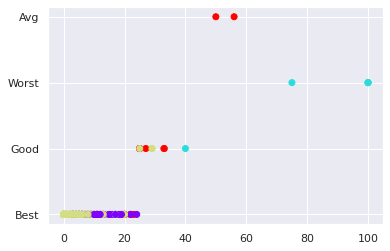

In [27]:
kmeans = KMeans(4)
kmeans.fit(df1)
identified_clusters = kmeans.fit_predict(df1)
data_with_clusters = ecom2.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['MaxNegsellerRate90_%'],data_with_clusters['MaxNegsellerRate90_%_new'],c=data_with_clusters['Clusters'],cmap='rainbow')

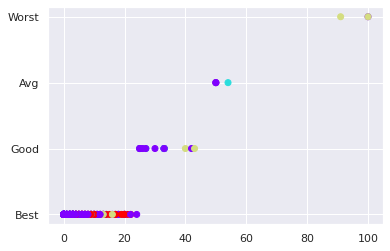

In [28]:
kmeans = KMeans(4)
kmeans.fit(df1)
identified_clusters = kmeans.fit_predict(df1)
data_with_clusters = ecom2.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['MaxNegsellerRate12mnth_%'],data_with_clusters['MaxNegsellerRate12mnth_%_new'],c=data_with_clusters['Clusters'],cmap='rainbow')

Based on these values less thna 40 % is preffered

##### Bar Plots

In [29]:
print(ecommerce['sellerratings'])

0        118
14       116
22        10
23      3134
24       610
        ... 
1784    2630
1785       3
1808      16
1814    3075
1815       4
Name: sellerratings, Length: 432, dtype: int64


In [30]:
n_ecom = ecommerce.copy()

In [31]:
n_ecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 432 entries, 0 to 1815
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date Added                432 non-null    datetime64[ns]
 1   category                  432 non-null    object        
 2   sellerlink                432 non-null    object        
 3   sellerlink-url            432 non-null    object        
 4   sellerstorefront-url      432 non-null    object        
 5   sellerproductcount        432 non-null    int64         
 6   sellerratings             432 non-null    int64         
 7   sellerdetails             432 non-null    object        
 8   seller business name      432 non-null    object        
 9   businessaddress           432 non-null    object        
 10  sellerbrandcount          432 non-null    int64         
 11  MaxNegsellerRate30_%      432 non-null    int64         
 12  MaxNegsellerRate90_% 

In [32]:
index_names = n_ecom[(n_ecom['MaxNegsellerRate30_%'] >= 30)].index
n_ecom.drop(index_names, inplace = True)
index_names1 = n_ecom[(n_ecom['MaxNegsellerRate90_%'] >= 30)].index
n_ecom.drop(index_names1, inplace = True)
index_names2 = n_ecom[(n_ecom['MaxNegsellerRate12mnth_%'] >= 40)].index
n_ecom.drop(index_names2, inplace = True)
index_names3 = n_ecom[(n_ecom['Pos_%'] <= 70)].index
n_ecom.drop(index_names3, inplace = True)
index_names4 = n_ecom[(n_ecom['sellerbrandcount'] <= 8)].index
n_ecom.drop(index_names4, inplace = True)
index_names5 = n_ecom[(n_ecom['HP1'] <= 30000)].index
n_ecom.drop(index_names5, inplace = True)
index_names6 = n_ecom[(n_ecom['HP2'] <= 30000)].index
n_ecom.drop(index_names6, inplace = True)

Set a threshold value for different columns : 

* For Max % of negative reviews in 30days, 90 days and 12 months, all the values less 30% and 40% is accepted
* lly for postive % of reviews, more than 70% is selected
* brand count more than 8
* Hero product 1 and 2 should have atleast 40000 reviews

On the basis of this the different bar plots are plotted


In [33]:
n_ecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 100 to 947
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date Added                8 non-null      datetime64[ns]
 1   category                  8 non-null      object        
 2   sellerlink                8 non-null      object        
 3   sellerlink-url            8 non-null      object        
 4   sellerstorefront-url      8 non-null      object        
 5   sellerproductcount        8 non-null      int64         
 6   sellerratings             8 non-null      int64         
 7   sellerdetails             8 non-null      object        
 8   seller business name      8 non-null      object        
 9   businessaddress           8 non-null      object        
 10  sellerbrandcount          8 non-null      int64         
 11  MaxNegsellerRate30_%      8 non-null      int64         
 12  MaxNegsellerRate90_%  

Based on filtering process top 24 products are found.

In [34]:
n_ecom.head(10)

,Date Added,category,sellerlink,sellerlink-url,sellerstorefront-url,sellerproductcount,sellerratings,sellerdetails,seller business name,businessaddress,...,MaxNegsellerRate90_%,MaxNegsellerRate12mnth_%,HP1,HP2,Sample brand name,Sample Brand URL,Pos_%,Phone_seller,E-mail_seller,Country
100,2020-11-15,Garden,Seller 101,Seller 101-link,Seller 101-storefrontlink,7000,3416,Kessler electronic GmbH\n Dieselstrasse 4\n 50...,Business Name:Kessler electronic GmbH,Dieselstr.4Kerpen50170DE,...,3,2,47337,32420,Visit the Varta Store,https://www.amazon.de/-/en/stores/VARTA+/page/...,97,49 (0)2273,info@kessler-electronic.de,DE
321,2020-11-15,Garden,Seller 322,Seller 322-link,Seller 322-storefrontlink,7000,196,Impressum\n \n Gesetzliche Anbieterkennung:\n ...,Business Name:VARIA System GmbH,Dr.-Salvador-Allende-Str.191ChemnitzSachsen091...,...,5,6,60384,57769,Visit the Umbra Store,https://www.amazon.de/-/en/stores/Umbra/page/4...,94,371 400 7682,shop@varia-store.com,DE
322,2020-11-15,Garden,Seller 323,Seller 323-link,Seller 323-storefrontlink,30000,699,Milovan Stojkovic\n Mühlenstr. 16\n 48431 Rhei...,Business Name:Milovan Stojkovic,Brechtestr. 44Rheine48431DE,...,9,6,71673,58332,Visit the Swiffer Store,https://www.amazon.de/-/en/stores/P%26G+Swiffe...,92,8 00 38 03,info@limuno.com,DE
495,2020-11-15,Garden,Seller 496,Seller 496-link,Seller 496-storefrontlink,100000,288,SELECT ELITE is committed to providing each cu...,Business Name:C. Y. MARKETING INC.,1249 S DIAMOND BAR BOULLEVARD UNIT 61DIAMOND B...,...,7,7,77714,70732,Visit the Weber Store,https://www.amazon.de/-/en/stores/Weber/page/9...,91,NaN,NaN,US
819,2020-11-15,Garden,Seller 820,Seller 820-link,Seller 820-storefrontlink,10000,4,Venner Sales is committed to providing each cu...,Business Name:Venner Sales Ltd,13 Nottingham RoadBelperDE56 1JGGB,...,0,0,51755,35167,Sharmans,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,100,NaN,NaN,GB
837,2020-11-15,Garden,Seller 838,Seller 838-link,Seller 838-storefrontlink,2000,415,Versand-King\n\nInhaber: Swen Bierschneider\n\...,Business Name:Swen Bierschneider,Kurt-Schumacher-Str. 123Gelsenkirchennrw45881DE,...,18,20,32420,30140,actiTube,https://www.amazon.de/-/en/actiTube/b/ref=bl_d...,80,NaN,bier@web.de,DE
882,2020-11-15,Garden,Seller 883,Seller 883-link,Seller 883-storefrontlink,4000,6086,Impressum\n \n Gesetzliche Anbieterkennung:\...,Business Name:Vitamed Matthias Quinger e.K.,Emil-Von-Behring Straße 2AltripRheinland Pfalz...,...,4,4,66776,32420,Visit the Varta Store,https://www.amazon.de/-/en/stores/VARTA+/page/...,94,+4962369329325,service@vitamed-quinger.com,DE
947,2020-11-15,Garden,Seller 948,Seller 948-link,Seller 948-storefrontlink,10000,159,want jp - Our vision is to become the world's ...,Business Name:VIP Plaza Japan Inc,MARUYAMACHO28-1 8th FloorSHIBUYAKUTOKYO1500044JP,...,8,6,86856,37716,ZOJIRUSHI,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,92,NaN,NaN,JP


Text(0.5, 1.0, 'Seller vs Hero Product 1')

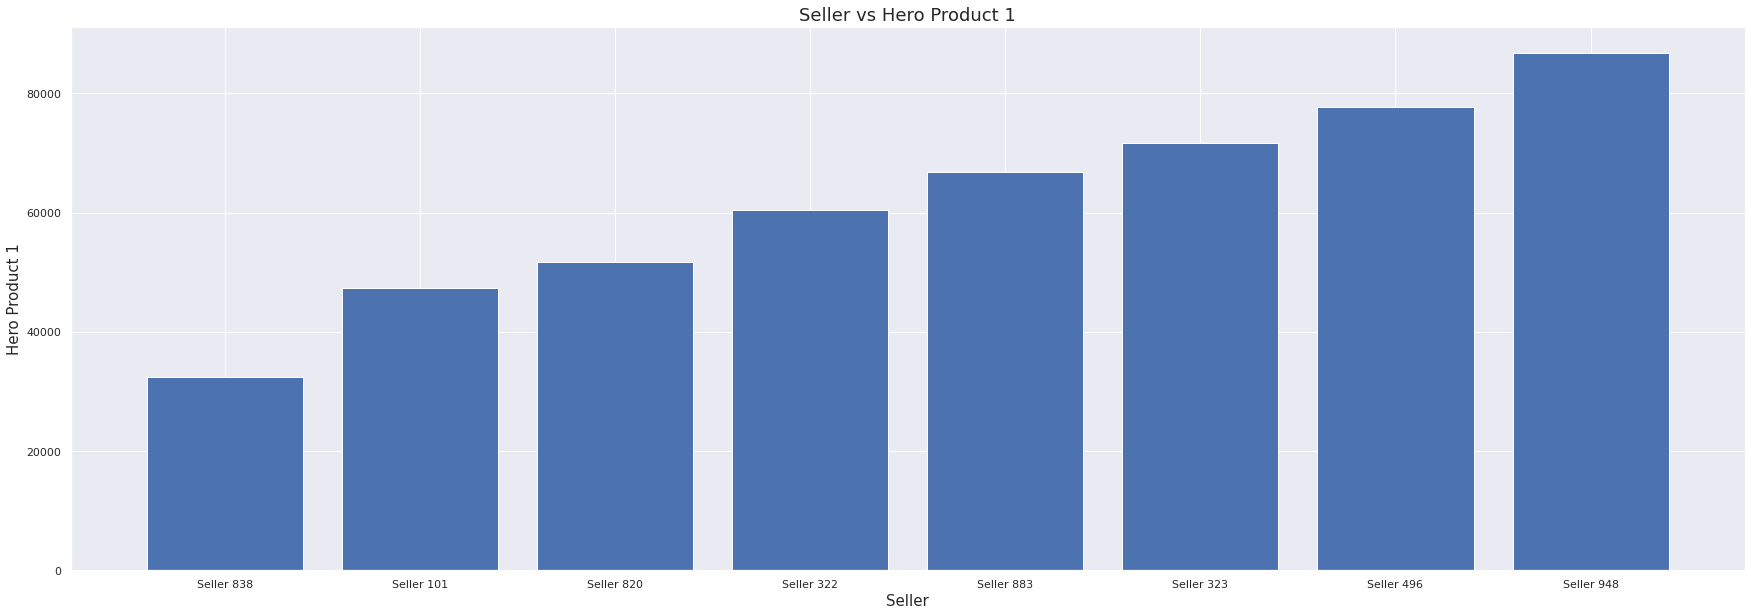

In [35]:
plt.figure(figsize=(30,10))
# make bar plot with matplotlib
n_ecom.sort_values(by=['HP1'], inplace= True)
plt.bar('sellerlink', 'HP1',data=n_ecom)
plt.xlabel("Seller", size=15)
plt.ylabel("Hero Product 1", size=15)
plt.title("Seller vs Hero Product 1", size=18)

Top Sellers acc to hero product

Text(0.5, 1.0, 'Seller vs Hero Product 2')

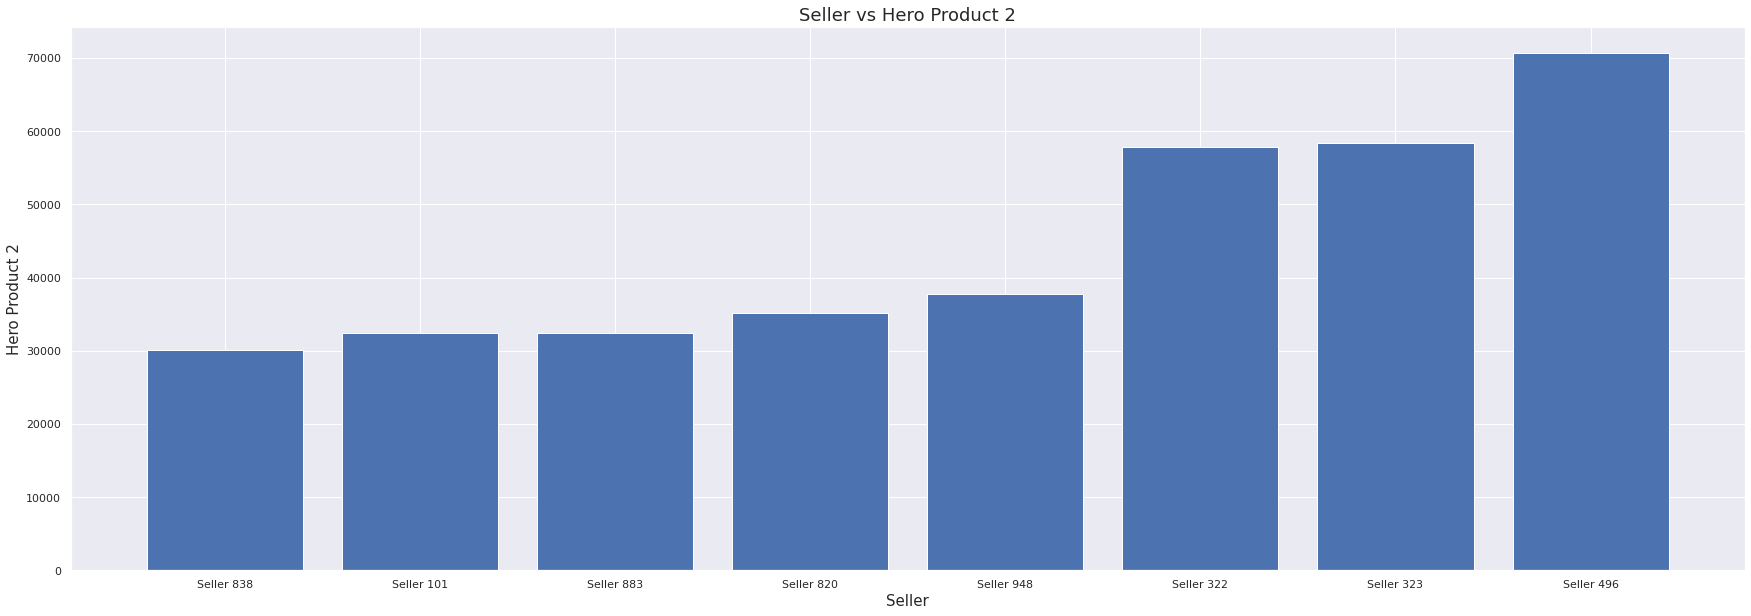

In [36]:
plt.figure(figsize=(30,10))
# make bar plot with matplotlib
n_ecom.sort_values(by=['HP2'], inplace= True)
plt.bar('sellerlink', 'HP2',data=n_ecom)
plt.xlabel("Seller", size=15)
plt.ylabel("Hero Product 2", size=15)
plt.title("Seller vs Hero Product 2", size=18)
#plt.savefig("bar_plot_matplotlib_Python.png")

Top sellers according to Hero Product 2:
* Seller 496, Seller 323, Seller 322, Seller 498, Seller 820

Text(0.5, 1.0, 'Seller vs Product Count')

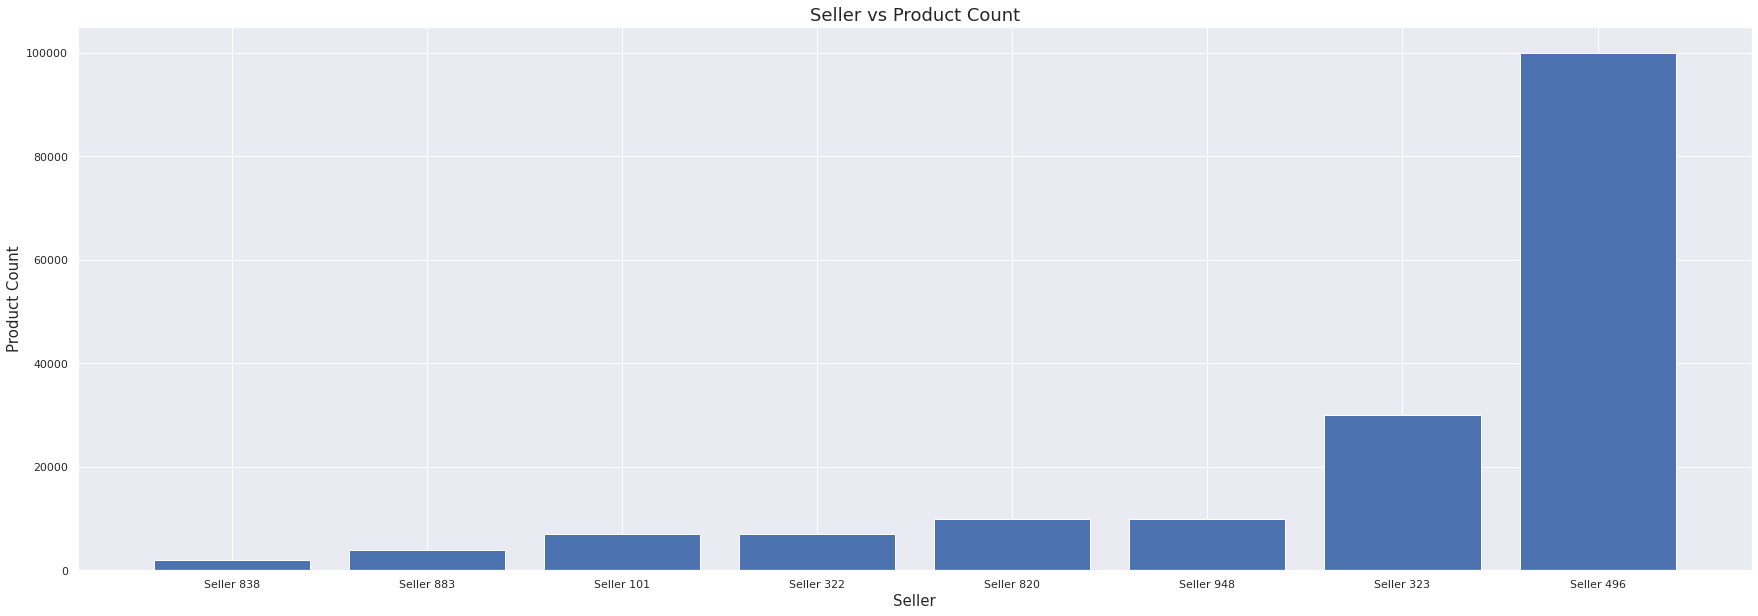

In [37]:
plt.figure(figsize=(30,10))
n_ecom.sort_values(by=['sellerproductcount'], inplace= True)
plt.bar('sellerlink', 'sellerproductcount',data=n_ecom)
plt.xlabel("Seller", size=15)
plt.ylabel("Product Count", size=15)
plt.title("Seller vs Product Count", size=18)
#plt.savefig("bar_plot_matplotlib_Python.png")

Top sellers according to Seller Product Count

Text(0.5, 1.0, 'Seller vs Brand Count')

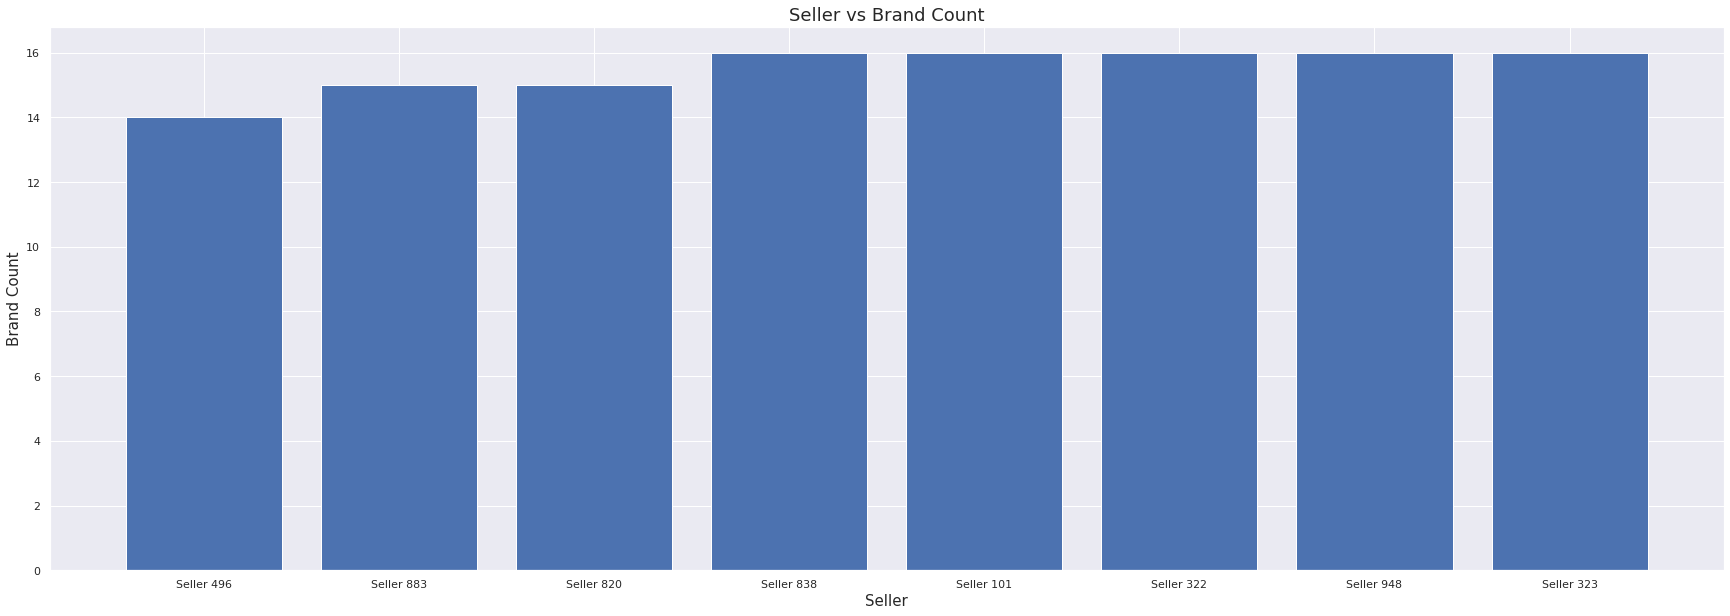

In [38]:
plt.figure(figsize=(30,10))
# make bar plot with matplotlib
n_ecom.sort_values(by=['sellerbrandcount'], inplace= True)
plt.bar('sellerlink', 'sellerbrandcount',data=n_ecom)
plt.xlabel("Seller", size=15)
plt.ylabel("Brand Count", size=15)
plt.title("Seller vs Brand Count", size=18)

Text(0.5, 1.0, 'Seller vs Max % Negative')

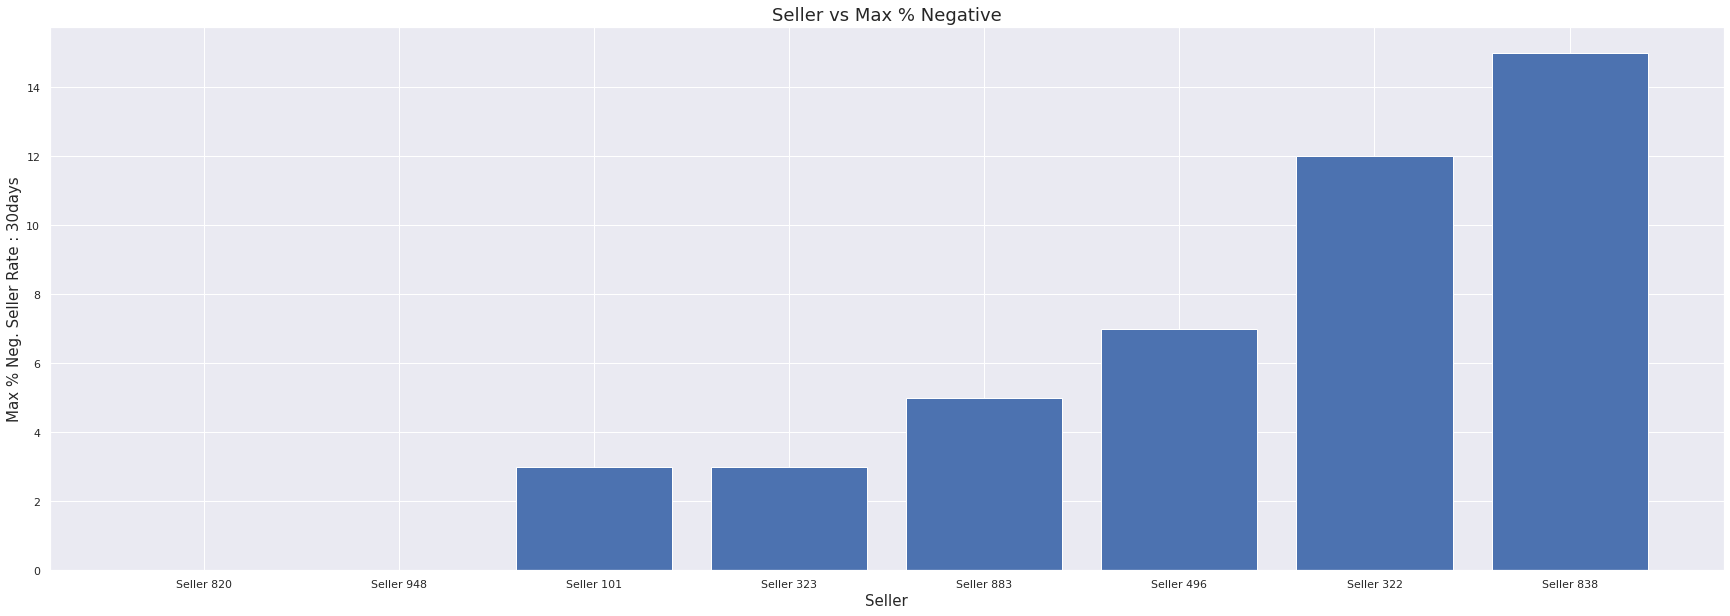

In [39]:
plt.figure(figsize=(30,10))
# make bar plot with matplotlib
n_ecom.sort_values(by=['MaxNegsellerRate30_%'], inplace= True)
plt.bar('sellerlink', 'MaxNegsellerRate30_%',data=n_ecom)
plt.xlabel("Seller", size=15)
plt.ylabel("Max % Neg. Seller Rate : 30days", size=15)
plt.title("Seller vs Max % Negative", size=18)

Text(0.5, 1.0, 'Seller vs Max % Neg')

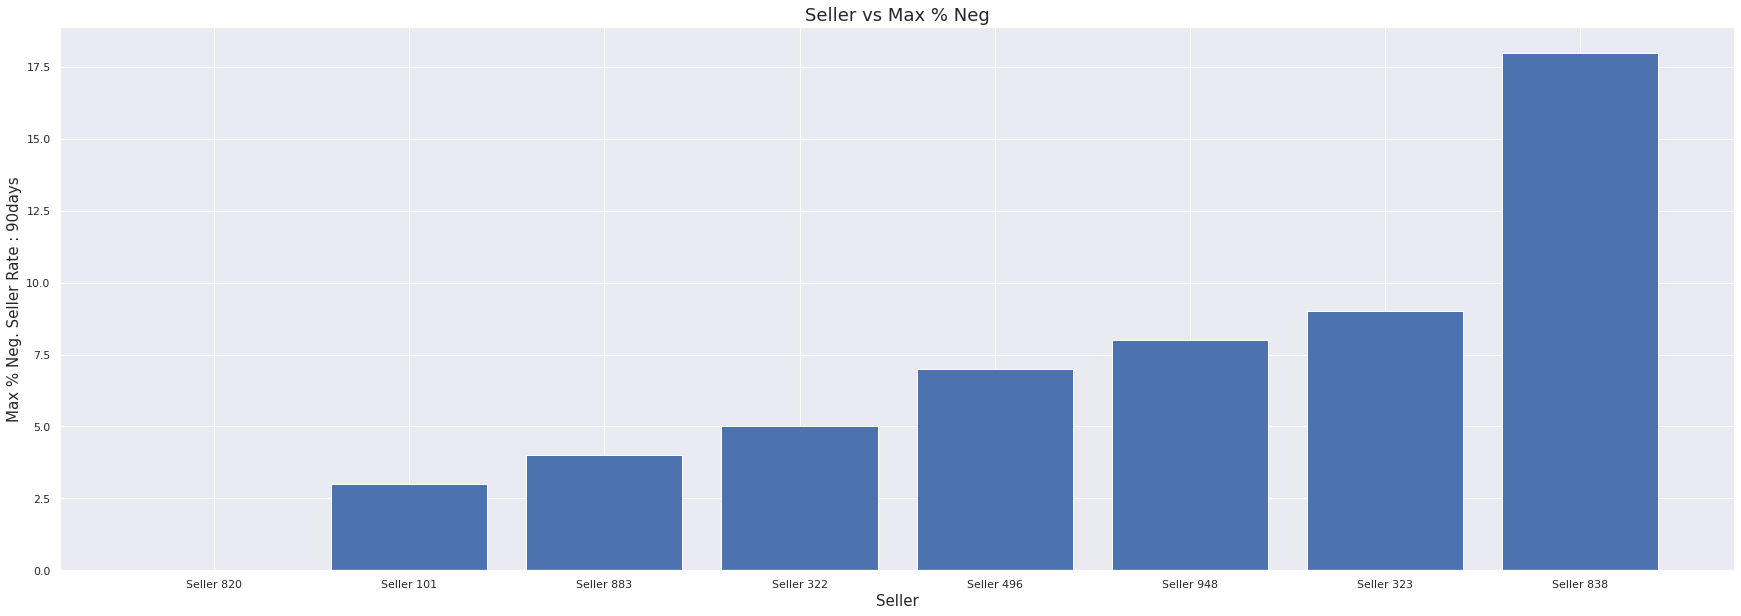

In [40]:
plt.figure(figsize=(30,10))
# make bar plot with matplotlib
n_ecom.sort_values('MaxNegsellerRate90_%',inplace = True)
plt.bar('sellerlink', 'MaxNegsellerRate90_%',data=n_ecom)
plt.xlabel("Seller", size=15)
plt.ylabel("Max % Neg. Seller Rate : 90days", size=15)
plt.title("Seller vs Max % Neg", size=18)

Text(0.5, 1.0, 'Seller vs Max % Neg')

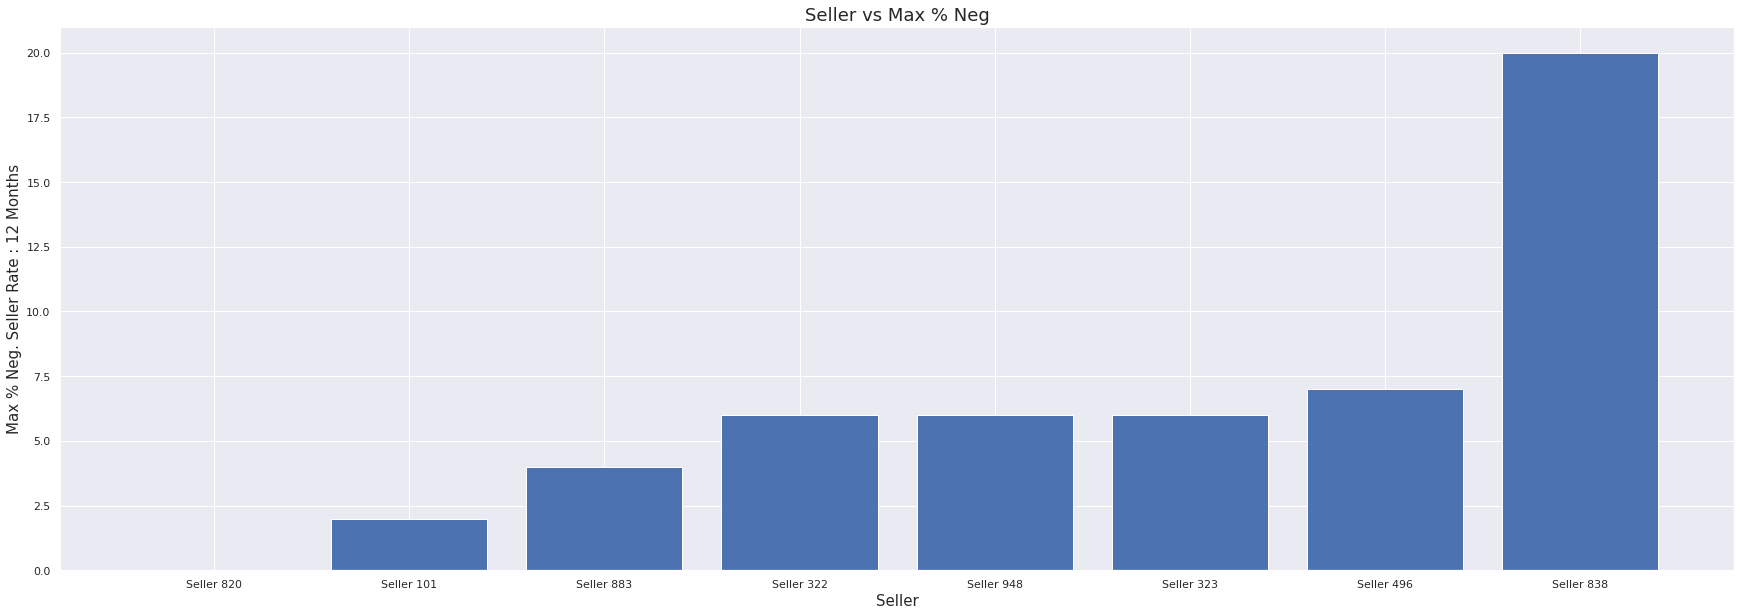

In [41]:
plt.figure(figsize=(30,10))
# make bar plot with matplotlib
n_ecom.sort_values('MaxNegsellerRate12mnth_%',inplace = True)
plt.bar('sellerlink', 'MaxNegsellerRate12mnth_%',data=n_ecom)
plt.xlabel("Seller", size=15)
plt.ylabel("Max % Neg. Seller Rate : 12 Months", size=15)
plt.title("Seller vs Max % Neg", size=18)

From all negative reviews, the hero product items has least % of negative reviews

Text(0.5, 1.0, 'Seller vs Pos %')

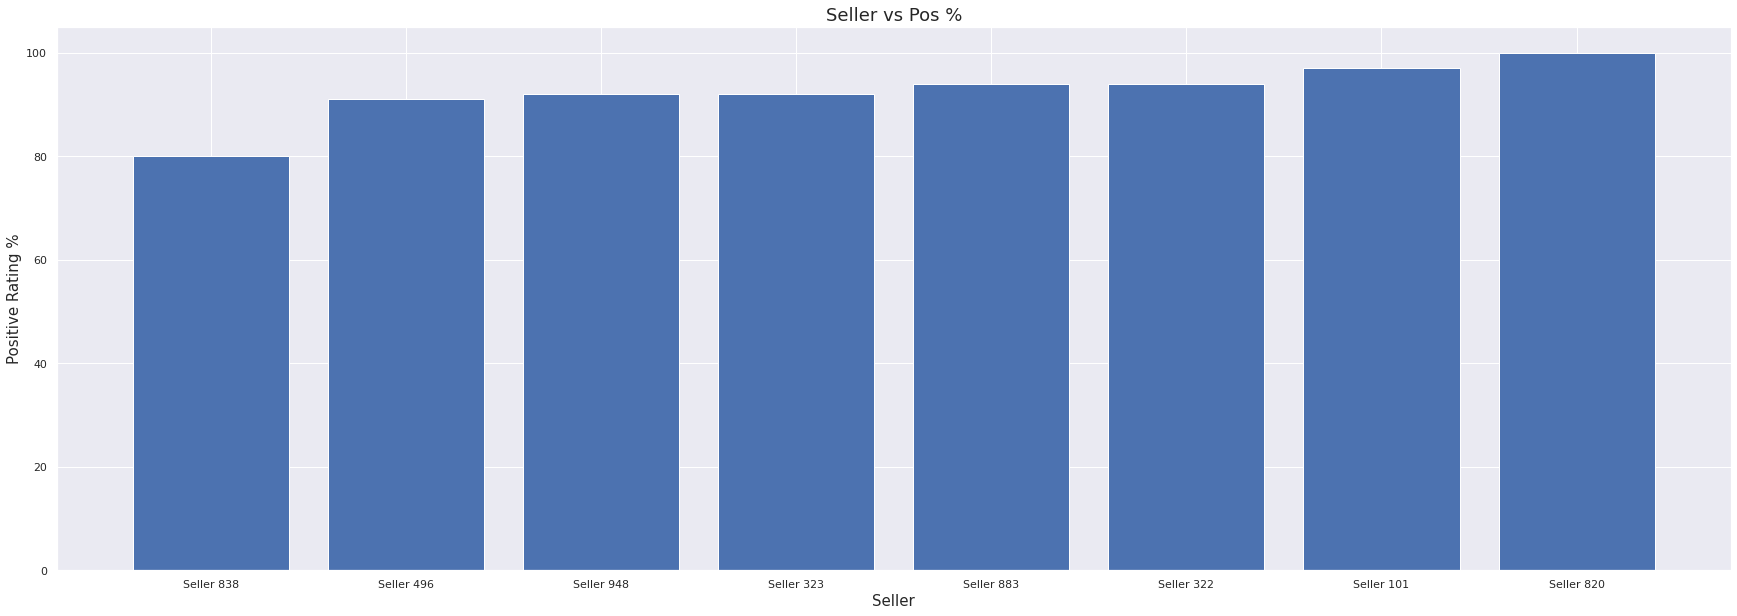

In [42]:
plt.figure(figsize=(30,10))
# make bar plot with matplotlib
n_ecom.sort_values('Pos_%',inplace = True)
plt.bar('sellerlink', 'Pos_%',data=n_ecom)
plt.xlabel("Seller", size=15)
plt.ylabel("Positive Rating %", size=15)
plt.title("Seller vs Pos %", size=18)

Text(0.5, 1.0, 'Country vs Brand Count')

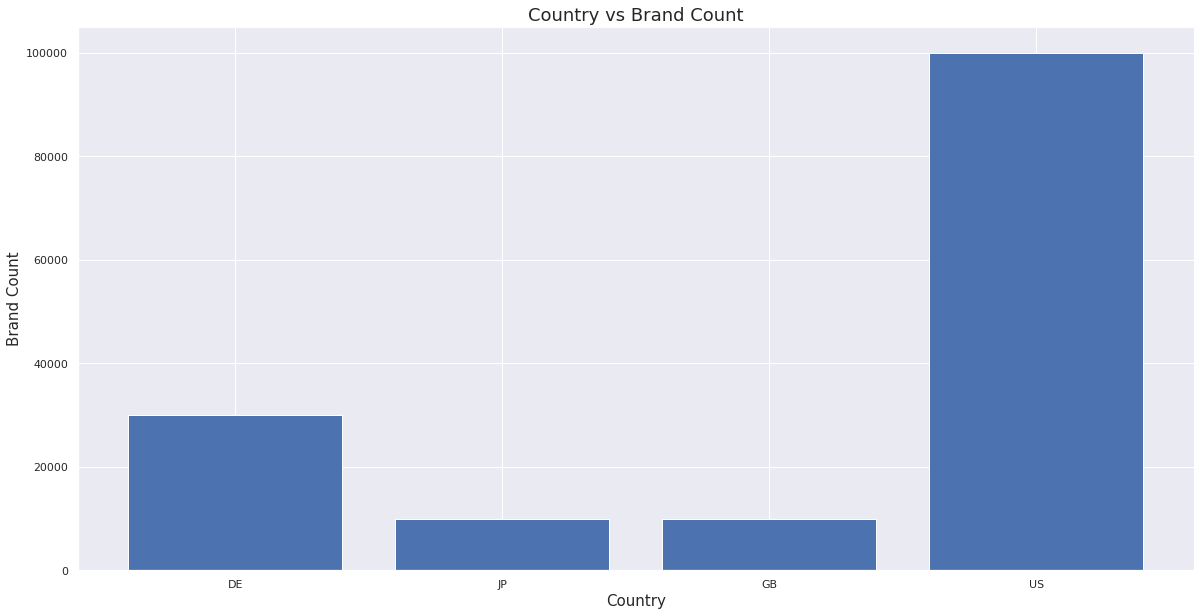

In [43]:
plt.figure(figsize=(20,10))
# make bar plot with matplotlib
n_ecom.sort_values('sellerproductcount',inplace = True)
plt.bar('Country', 'sellerproductcount',data=n_ecom)
plt.xlabel("Country", size=15)
plt.ylabel("Brand Count", size=15)
plt.title("Country vs Brand Count", size=18)

Geographical istribution is observed here. With Germany(DE) and US having the max brand count

In [44]:
print(ecommerce['sellerratings'])

0        118
14       116
22        10
23      3134
24       610
        ... 
1784    2630
1785       3
1808      16
1814    3075
1815       4
Name: sellerratings, Length: 432, dtype: int64


In [45]:
n_ecom.sort_values(by = 'Pos_%',ascending=False)

,Date Added,category,sellerlink,sellerlink-url,sellerstorefront-url,sellerproductcount,sellerratings,sellerdetails,seller business name,businessaddress,...,MaxNegsellerRate90_%,MaxNegsellerRate12mnth_%,HP1,HP2,Sample brand name,Sample Brand URL,Pos_%,Phone_seller,E-mail_seller,Country
819,2020-11-15,Garden,Seller 820,Seller 820-link,Seller 820-storefrontlink,10000,4,Venner Sales is committed to providing each cu...,Business Name:Venner Sales Ltd,13 Nottingham RoadBelperDE56 1JGGB,...,0,0,51755,35167,Sharmans,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,100,NaN,NaN,GB
100,2020-11-15,Garden,Seller 101,Seller 101-link,Seller 101-storefrontlink,7000,3416,Kessler electronic GmbH\n Dieselstrasse 4\n 50...,Business Name:Kessler electronic GmbH,Dieselstr.4Kerpen50170DE,...,3,2,47337,32420,Visit the Varta Store,https://www.amazon.de/-/en/stores/VARTA+/page/...,97,49 (0)2273,info@kessler-electronic.de,DE
882,2020-11-15,Garden,Seller 883,Seller 883-link,Seller 883-storefrontlink,4000,6086,Impressum\n \n Gesetzliche Anbieterkennung:\...,Business Name:Vitamed Matthias Quinger e.K.,Emil-Von-Behring Straße 2AltripRheinland Pfalz...,...,4,4,66776,32420,Visit the Varta Store,https://www.amazon.de/-/en/stores/VARTA+/page/...,94,+4962369329325,service@vitamed-quinger.com,DE
321,2020-11-15,Garden,Seller 322,Seller 322-link,Seller 322-storefrontlink,7000,196,Impressum\n \n Gesetzliche Anbieterkennung:\n ...,Business Name:VARIA System GmbH,Dr.-Salvador-Allende-Str.191ChemnitzSachsen091...,...,5,6,60384,57769,Visit the Umbra Store,https://www.amazon.de/-/en/stores/Umbra/page/4...,94,371 400 7682,shop@varia-store.com,DE
947,2020-11-15,Garden,Seller 948,Seller 948-link,Seller 948-storefrontlink,10000,159,want jp - Our vision is to become the world's ...,Business Name:VIP Plaza Japan Inc,MARUYAMACHO28-1 8th FloorSHIBUYAKUTOKYO1500044JP,...,8,6,86856,37716,ZOJIRUSHI,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,92,NaN,NaN,JP
322,2020-11-15,Garden,Seller 323,Seller 323-link,Seller 323-storefrontlink,30000,699,Milovan Stojkovic\n Mühlenstr. 16\n 48431 Rhei...,Business Name:Milovan Stojkovic,Brechtestr. 44Rheine48431DE,...,9,6,71673,58332,Visit the Swiffer Store,https://www.amazon.de/-/en/stores/P%26G+Swiffe...,92,8 00 38 03,info@limuno.com,DE
495,2020-11-15,Garden,Seller 496,Seller 496-link,Seller 496-storefrontlink,100000,288,SELECT ELITE is committed to providing each cu...,Business Name:C. Y. MARKETING INC.,1249 S DIAMOND BAR BOULLEVARD UNIT 61DIAMOND B...,...,7,7,77714,70732,Visit the Weber Store,https://www.amazon.de/-/en/stores/Weber/page/9...,91,NaN,NaN,US
837,2020-11-15,Garden,Seller 838,Seller 838-link,Seller 838-storefrontlink,2000,415,Versand-King\n\nInhaber: Swen Bierschneider\n\...,Business Name:Swen Bierschneider,Kurt-Schumacher-Str. 123Gelsenkirchennrw45881DE,...,18,20,32420,30140,actiTube,https://www.amazon.de/-/en/actiTube/b/ref=bl_d...,80,NaN,bier@web.de,DE


Sorted df on the basis of pos% of rating, these are the top sellers